<a href="https://colab.research.google.com/github/Nataliia-Shap/4-course-PatternRecognition/blob/main/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Кольорові простори

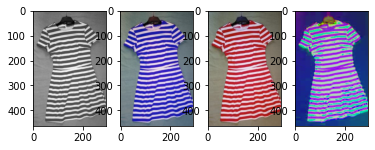

(463, 293)
[[123 122 122 ...  79  77  77]
 [122 122 124 ...  79  77  76]
 [127 130 128 ...  79  78  76]
 ...
 [121 121 119 ... 106 107 107]
 [122 122 119 ... 106 106 107]
 [122 122 119 ... 106 106 107]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
nemo = cv2.imread('/content/drive/My Drive/Colab Notebooks/dress.png')
nemo_gray = cv2.imread('/content/drive/My Drive/Colab Notebooks/dress.png',cv2.IMREAD_GRAYSCALE)
nemo_rgb = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
nemo_gray = cv2.cvtColor(nemo, cv2.COLOR_BGR2GRAY)
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2HSV)
plt.subplot(1, 4, 1) 
plt.imshow(nemo_gray,cmap="gray")
plt.subplot(1, 4, 2) 
plt.imshow(nemo)
plt.subplot(1, 4, 3) 
plt.imshow(nemo_rgb)
plt.subplot(1, 4, 4)  
plt.imshow(hsv_nemo)
plt.show() 
#cv2_imshow(nemo_gray)  
print(nemo_gray.shape)  
print(nemo_gray)

### Створення маски червоного кольору

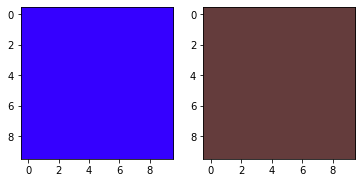

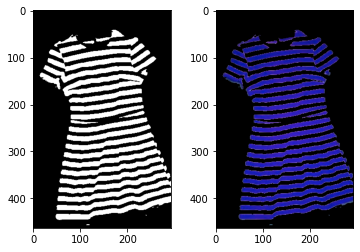

In [2]:
light_orange =np.array([0,100,100])
dark_orange = np.array([179,255,255]) 
from matplotlib.colors import hsv_to_rgb
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange) 
result = cv2.bitwise_and(nemo, nemo, mask= mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()      

### Створення маски білого кольору

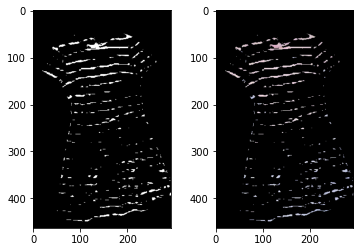

In [3]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)  
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white) 
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()  

### Створення об'єднаної маски

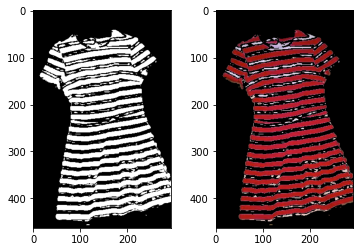

In [4]:
final_mask = mask + mask_white
result_F = cv2.bitwise_and(nemo_rgb, nemo_rgb, mask=final_mask) 
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result_F)
plt.show() 

### Гістограма зображення

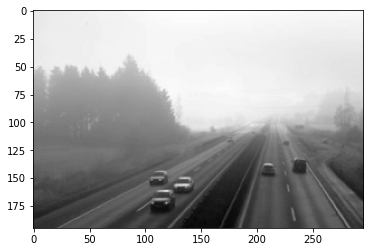

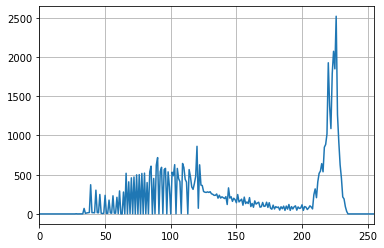

In [5]:
road = cv2.imread('/content/drive/My Drive/Colab Notebooks/road.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(road,cmap="gray")
plt.show()
hist = cv2.calcHist([road], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 255])
plt.grid()
plt.show()

### Вирівнювання гістограми

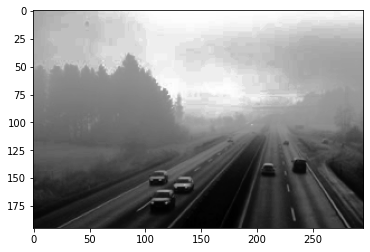

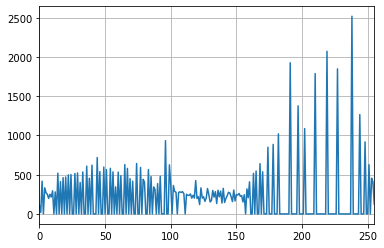

In [6]:
equ = cv2.equalizeHist(road)
plt.imshow(equ,cmap="gray")
plt.show()
hist = cv2.calcHist([equ], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 255])
plt.grid()
plt.show()

### Гаусове згладжування

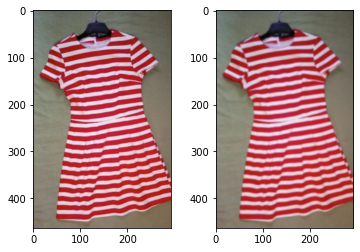

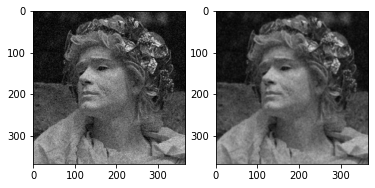

In [7]:
nemo_blur = cv2.GaussianBlur(nemo_rgb,(5,5),0)
plt.subplot(1, 2, 1) 
plt.imshow(nemo_rgb)
plt.subplot(1, 2, 2)  
plt.imshow(nemo_blur )
plt.show() 
face = cv2.imread('/content/drive/My Drive/Colab Notebooks/face.png')
#face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
face_blur = cv2.GaussianBlur(face,(5,5),0)
plt.subplot(1, 2, 1) 
plt.imshow(face)
plt.subplot(1, 2, 2)  
plt.imshow(face_blur )
plt.show()

### Обертання

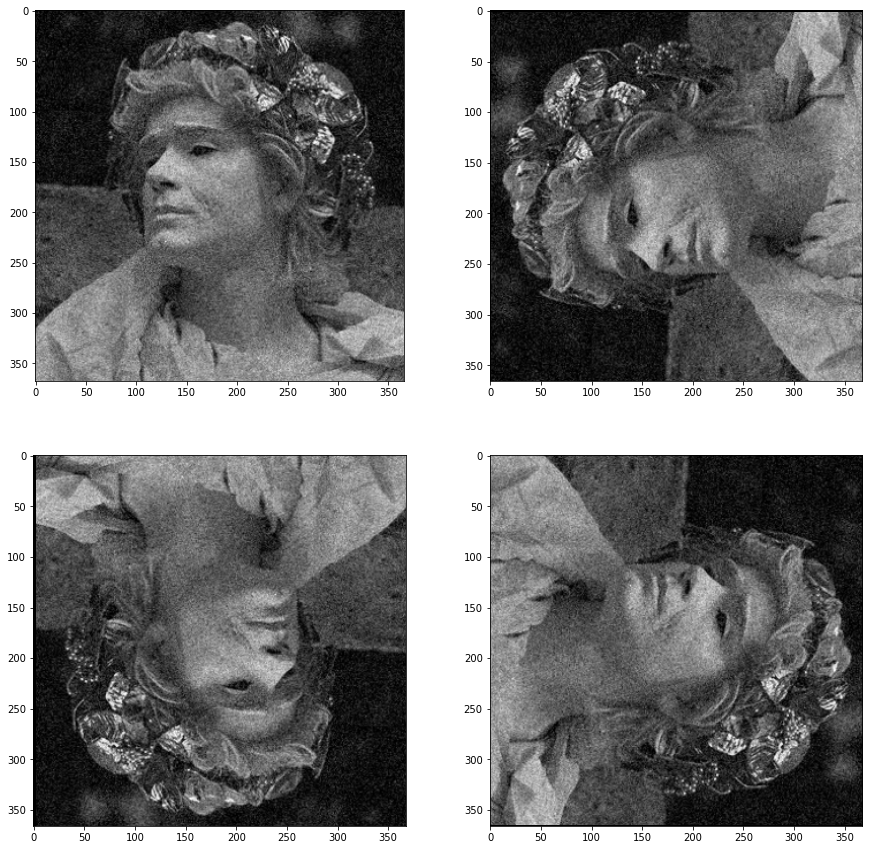

In [8]:
img=face 
width=img.shape[0]
height=img.shape[1]
M90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1) 
M180 = cv2.getRotationMatrix2D((width/2, height/2), 180, 1) 
M270 = cv2.getRotationMatrix2D((width/2, height/2), 270, 1) 
img_rot90 = cv2.warpAffine(img, M90, (width, height)) 
img_rot180 = cv2.warpAffine(img, M180, (width, height)) 
img_rot270 = cv2.warpAffine(img, M270, (width, height)) 
plt.figure(figsize = (15, 15)) 
plt.subplot(221) 
plt.imshow(img, cmap='gray') 
plt.subplot(222) 
plt.imshow(img_rot90, cmap='gray') 
plt.subplot(223) 
plt.imshow(img_rot180, cmap='gray') 
plt.subplot(224) 
plt.imshow(img_rot270, cmap='gray') 
plt.show()